In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.style.use('seaborn')

1. Read the dataset to python environment.

In [2]:
df=pd.read_excel('iris.xls')
df

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
#check no.of coloum
df.shape

(150, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
#using boolean sum. isna() gives back true or false value. By adding this we get number of null values.
df.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [6]:
# using isna(), it shows True if there is any Null values 
df.isna()

,SL,SW,PL,PW,Classification
0,False,False,False,False,False
1,False,False,False,False,False
2,True,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,True,False,False
148,False,False,False,False,False


In [ ]:
#Findings:
1)We can see that three columns have null values.
2)So,these columns can be filled with mean.

In [7]:
df['SL'].fillna(df['SL'].mean(),inplace=True)

In [8]:
df['SW'].fillna(df['SW'].mean(),inplace=True)
df['PL'].fillna(df['PL'].mean(),inplace=True)
df.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [9]:
df.shape

(150, 5)

In [10]:
df

,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.40000,0.2,Iris-setosa
1,4.900000,3.0,1.40000,0.2,Iris-setosa
2,5.855944,3.2,1.30000,0.2,Iris-setosa
3,4.600000,3.1,1.50000,0.2,Iris-setosa
4,5.000000,3.6,1.40000,0.2,Iris-setosa
...,...,...,...,...,...
145,6.700000,3.0,5.20000,2.3,Iris-virginica
146,6.300000,2.5,5.00000,1.9,Iris-virginica
147,6.500000,3.0,3.75625,2.0,Iris-virginica
148,6.200000,3.4,5.40000,2.3,Iris-virginica


In [11]:
df.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [12]:
df.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [13]:
# Splitting the dataset into features and target set.

x = df.drop(['Classification'],axis=1) #features
y = df['Classification'] #target

### Model1:Logistic Regression

In [14]:
# Splitting the data set into training and testin test.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state =42)

In [15]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model = log_model.fit(x_train,y_train)
y_pred = log_model.predict(x_test)

In [16]:
y_pred

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa'], dtype=object)

#we check good the model in classification

In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [18]:
from sklearn.metrics import accuracy_score
acc_logModel = accuracy_score(y_test,y_pred)

In [19]:
models = []
models.append(['Logisitic Regression Classifier',acc_logModel])

# Model2 - k-NN

In [23]:
from sklearn.neighbors import KNeighborsClassifier
acc =[]
neighbors = np.arange(3,15)

In [24]:
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    classifier.fit(x_train,y_train)
    y_pred = classifier.predict(x_test)
    acc_score = accuracy_score(y_test,y_pred)
    acc.append(acc_score)

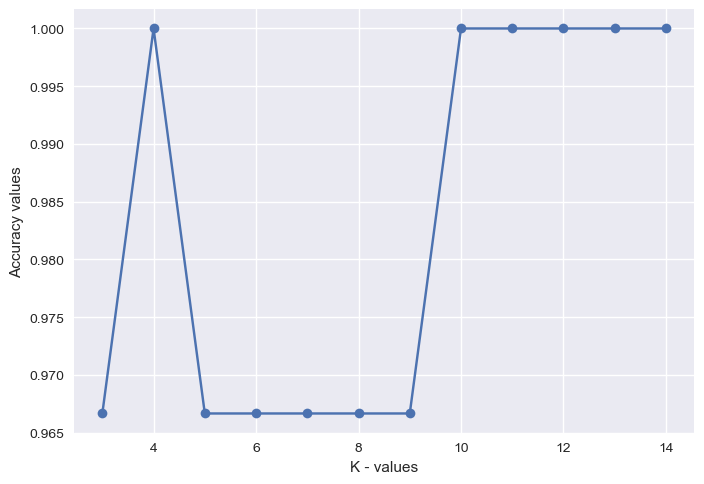

In [25]:
plt.plot(np.arange(3,15), acc, 'o-')
plt.xlabel('K - values')
plt.ylabel('Accuracy values')
plt.show() 

In [26]:
# We can take k-value 5 which also shows high accuracy

classifier = KNeighborsClassifier(n_neighbors=4, metric='minkowski')
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)

In [27]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [28]:
acc_knn = accuracy_score(y_test,y_pred)

In [29]:
models.append(['k-NN Classifier',acc_knn])

### Model 3: SVM

In [ ]:
# Model 3.1: Linear SVM

In [30]:
from sklearn.svm import SVC

svm_linear=SVC(kernel='linear')

svm_linear.fit(x_train,y_train)
y_pred=svm_linear.predict(x_test)

In [33]:
from sklearn.metrics import confusion_matrix,accuracy_score
acc_svm = accuracy_score(y_test,y_pred)
print('Accuracy score is:',acc_svm)

Accuracy score is: 1.0


In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [34]:
models.append(['Linear SVM',acc_svm])

In [ ]:
## Model 3.2: Radial Basis Function SVM

In [37]:
svm_linear=SVC(kernel='rbf')

svm_linear.fit(x_train,y_train)
y_pred=svm_linear.predict(x_test)
acc_rbf = accuracy_score(y_test,y_pred)
print('Accuracy score is:',acc_rbf)

Accuracy score is: 1.0


In [36]:
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [38]:
models.append(['RBF',acc_rbf])

# Model 4. Decision Tree

In [41]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
acc_dec = accuracy_score(y_test,y_pred)
print('Accuracy score is:',acc_dec)

Accuracy score is: 1.0


In [42]:
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [43]:
models.append(['DecisionTree',acc_dec])

# Model 5:Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier
rf_cls = RandomForestClassifier()
rf_cls = rf_cls.fit(x_train,y_train)
y_pred_rf = rf_cls.predict(x_test)

In [45]:
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [46]:
acc_random = accuracy_score(y_test,y_pred_rf)
models.append(['Random Forest',acc_random])

In [47]:
mod = pd.DataFrame(models, columns = ['Models','Accuracy Score'])
mod

,Models,Accuracy Score
0,Logisitic Regression Classifier,1.0
1,k-NN Classifier,1.0
2,Linear SVM,1.0
3,RBF,1.0
4,DecisionTree,1.0
5,Random Forest,1.0


In [ ]:
#Findings
1)All these model gives 100% accuracy for the prediction.